In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

# Load Data

In [3]:
finData = np.loadtxt('tictac_final.txt')
finData

array([[ 1.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.],
       ...,
       [-1.,  1., -1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ..., -1.,  1., -1.],
       [-1., -1.,  1., ...,  1.,  1., -1.]])

In [4]:
singData = np.loadtxt('tictac_single.txt')
singData

array([[ 1., -1.,  0., ...,  1.,  0.,  6.],
       [ 1.,  0.,  1., ..., -1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       ...,
       [-1., -1.,  0., ...,  1.,  0.,  2.],
       [ 0.,  1.,  1., ...,  1., -1.,  0.],
       [ 1.,  1., -1., ..., -1.,  0.,  4.]])

In [5]:
multData = np.loadtxt('tictac_multi.txt')
multData

array([[ 1., -1.,  0., ...,  1.,  0.,  1.],
       [ 1.,  0.,  1., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [-1., -1.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1., -1., ...,  0.,  0.,  1.]])

# Train Models

## Linear SVM

In [9]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

### SVM Final Dataset (binary classification)
- X values are states of TicTacToe squares
- Y values are winning player (1 or -1) (user vs CPU)

SVM Binary CV: 98.95249487354751 %


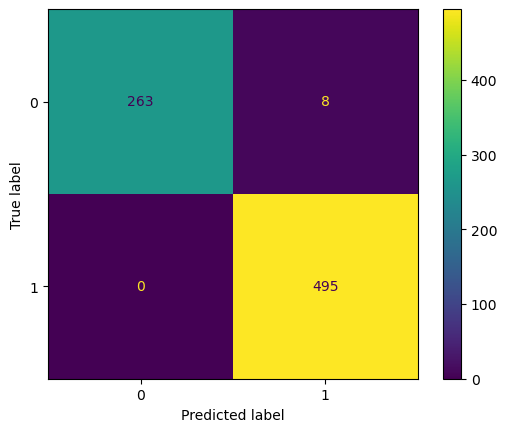

accuracy :98.4375 %


In [6]:
# DAta
xFin = finData[:, :9]
yFin = finData[:, 9:].ravel()
X_tr, X_test, y_tr, y_test = train_test_split(xFin, yFin, test_size = 0.2)

# Train
svmClf = svm.SVC(probability=True).fit(X_tr, y_tr)

# CV
np.random.shuffle(finData)
print("SVM Binary CV: {0} %" .format(np.mean(cross_val_score(svmClf, X_tr, y_tr, cv = 10) * 100))) # post-shuffle accuracy

# CFM
y_pred = cross_val_predict(svmClf, X_tr, y_tr, cv=10)
cfm = metrics.confusion_matrix(y_tr, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm)

cm_display.plot()
plt.show()

# Accuracy
y_test_pred = svmClf.predict(X_test)
corr = y_test_pred == y_test
Accuracy_final = np.mean(corr)
print(f"accuracy :{Accuracy_final*100} %")

### SVM Single Label Dataset (multi-class classification)
- X values are states of TicTacToe squares
- Y values are square of optimal move for player O (-1)(CPU)

SVM Single CV: 78.22519083969465 %


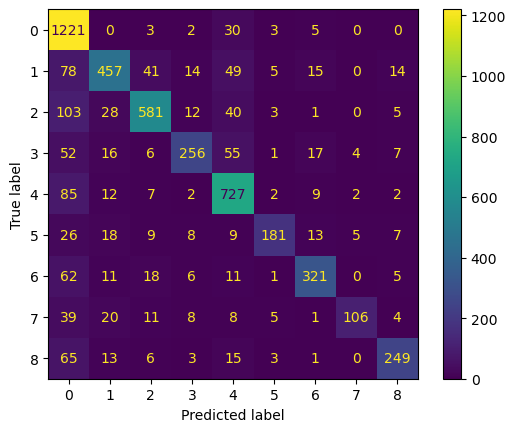

accuracy :75.36231884057972 %


In [7]:
# Data
xSing = singData[:, :9]
ySing = singData[:, 9:].ravel()
X_tr, X_test, y_tr, y_test = train_test_split(xSing, ySing, test_size = 0.2)

# Train
svmClf = svm.SVC(decision_function_shape='ovo', C=0.4)
svmClf = svmClf.fit(X_tr, y_tr)

# CV
np.random.shuffle(singData)
print("SVM Single CV: {0} %" .format(np.mean(cross_val_score(svmClf, X_tr, y_tr, cv=10) * 100))) # post-shuffle accuracy

# CFM
y_pred = cross_val_predict(svmClf, X_tr, y_tr, cv=10)
cfm = metrics.confusion_matrix(y_tr, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm)

cm_display.plot()
plt.show()

# Accuracy
y_test_pred = svmClf.predict(X_test)
corr = y_test_pred == y_test
Accuracy_final = np.mean(corr)
print(f"accuracy :{Accuracy_final*100} %")

## K-Nearest Neighbors (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

### KNN Final Dataset (binary classification)

KNN Binary CV: 97.51973516679399 %


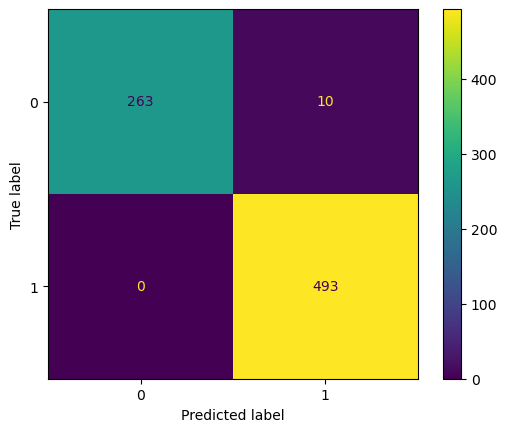

Accuracy :97.39583333333334 %


In [9]:
# Data
xFin = finData[:, :9]
yFin = finData[:, 9:].ravel()
X_tr, X_test, y_tr, y_test = train_test_split(xFin, yFin, test_size = 0.2)

# Train
knnClf = KNeighborsClassifier(algorithm='auto', n_neighbors=9)
knnClf = knnClf.fit(X_tr, y_tr)

# CV
np.random.shuffle(finData)
print("KNN Binary CV: {0} %" .format(np.mean(cross_val_score(knnClf, X_tr, y_tr)) * 100))

# CFM
y_pred = cross_val_predict(knnClf, X_tr, y_tr, cv=10)
cfm = metrics.confusion_matrix(y_tr, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm)

cm_display.plot()
plt.show() 

# Accuracy
y_test_pred = knnClf.predict(X_test)
corr = y_test_pred == y_test
Accuracy_final = np.mean(corr)
print(f"Accuracy :{Accuracy_final*100} %")

### KNN Single-Label Dataset (mulit-class classification)

KNN Single CV: 73.47328244274809 %


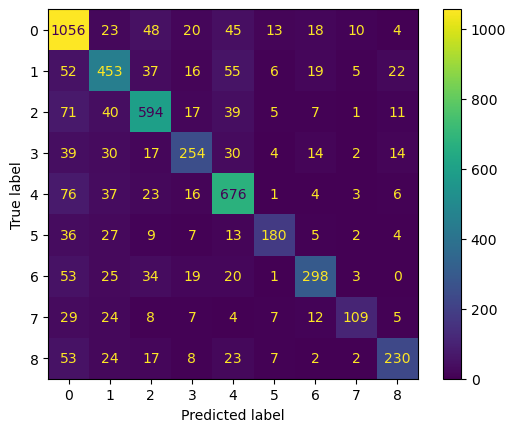

Accuracy :75.36231884057972 %


In [10]:
# Data
xSing = singData[:, :9]
ySing = singData[:, 9:].ravel()
X_tr, X_test, y_tr, y_test = train_test_split(xSing, ySing, test_size = 0.2)

# Model
knnClf = KNeighborsClassifier(algorithm='auto', n_neighbors=9)
knnClf = knnClf.fit(X_tr, y_tr)

# CV
np.random.shuffle(singData)
print("KNN Single CV: {0} %" .format(np.mean(cross_val_score(knnClf, X_tr, y_tr)) * 100)) #post-shuffle accuracy

# CFM
y_pred = cross_val_predict(knnClf, X_tr, y_tr, cv=5)
cfm = metrics.confusion_matrix(y_tr, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm)

cm_display.plot()
plt.show() 

# Accuracy
y_test_pred = knnClf.predict(X_test)
corr = y_test_pred == y_test
Accuracy_final = np.mean(corr)
print(f"Accuracy :{Accuracy_final*100} %")

## Multilayer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

### Final Dataset (Binary Classification)

MLP Binary CV: 98.43391902215431 %


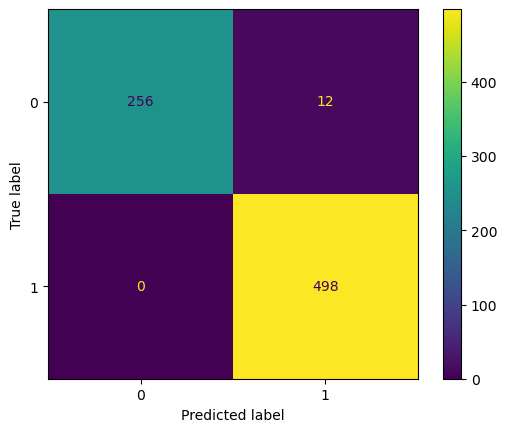

Accuracy :99.47916666666666 %


In [12]:
# Data
xFin = finData[:, :9]
yFin = finData[:, 9:].ravel()
X_tr, X_test, y_tr, y_test = train_test_split(xFin, yFin, test_size = 0.2)

# train
mlpClf = MLPClassifier(alpha=1e-5, max_iter = 1000)
mlpClf = mlpClf.fit(X_tr, y_tr)

# CV
np.random.shuffle(finData)
print("MLP Binary CV: {0} %" .format(np.mean(cross_val_score(mlpClf, X_tr, y_tr)) *100))# post-shuffle accuracy

# CFM 
y_pred = cross_val_predict(mlpClf, X_tr, y_tr, cv=5)
cfm = metrics.confusion_matrix(y_tr, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm)

cm_display.plot()
plt.show() 

# Accuracy
y_test_pred = mlpClf.predict(X_test)
corr = y_test_pred == y_test
Accuracy_final = np.mean(corr)
print(f"Accuracy :{Accuracy_final*100} %")

### Single-Label Dataset (mulit-class classification)

C:\Users\kraus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kraus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kraus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Single CV: 86.52671755725191 %


C:\Users\kraus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kraus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


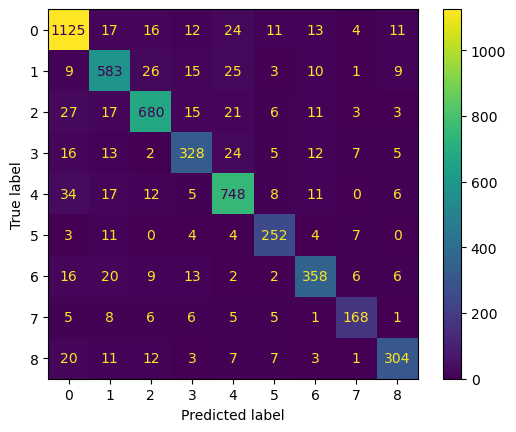

Accuracy :91.07551487414187 %


In [11]:
# Data
xSing = singData[:, :9]
ySing = singData[:, 9:].ravel()
X_tr, X_test, y_tr, y_test = train_test_split(xSing, ySing, test_size = 0.2)

# Train
mlpClf = MLPClassifier(alpha=1e-05, max_iter = 1000)
mlpClf = mlpClf.fit(X_tr, y_tr)

# CV
np.random.shuffle(singData)
print("MLP Single CV: {0} %" .format(np.mean(cross_val_score(mlpClf, X_tr, y_tr, cv = 2)) *100)) # post shuffle accuracy

# CFM
y_pred = cross_val_predict(mlpClf, X_tr, y_tr, cv=2)
cfm = metrics.confusion_matrix(y_tr, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm)

cm_display.plot()
plt.show() 

# Accuracy
y_test_pred = mlpClf.predict(X_test)
corr = y_test_pred == y_test
Accuracy_final = np.mean(corr)
print(f"Accuracy :{Accuracy_final*100} %")